In [219]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage

In [220]:
def overlay(overlay_img, bg_img, scale, starting_y, starting_x, rotate=False, choice=''):
    # Rotating image 45 degrees if it has to be rotated
    if rotate:
        img = overlay_img
        overlay_img = scipy.ndimage.rotate(overlay_img, 45)
        # cropped_image = tr[200:1150, 100:1165]
        # plt.imshow(cropped_image)
        # overlay_img = cropped_image
    
    # Scaling image
    overlay_img = cv2.resize(overlay_img, (0, 0), fx=scale, fy=scale)

    # Overlaying overlay image ontop of background image
    bg_img[starting_y:overlay_img.shape[0]+starting_y,
              starting_x:overlay_img.shape[1] +starting_x] = overlay_img

    # Showing image
    plt.title(choice)
    plt.imshow(bg_img)
    plt.show()

    return bg_img


In [221]:
def sepia(image):
    kernel = np.array([[0.393, 0.769, 0.189],
                       [0.349, 0.686, 0.168],
                       [0.272, 0.534, 0.131]])

    # multiply each layer (r, g, b) by the corresponding array to convert to sepia
    sepia_img = cv2.transform(image, kernel)

    return sepia_img


def sharpen(image):
    kernel = np.array([[-1, -1, -1],
                       [-1, 9.5, -1],
                       [-1, -1, -1]])
    # change the pixel intensity value of an image based on the surrounding pixel intensity values
    sharpened_img = cv2.filter2D(image, -1, kernel)

    return sharpened_img


def sharpened_sepia(image):
    sepia_img = sepia(image)
    sharpened_img = sharpen(sepia_img)
    converted_color = cv2.cvtColor(sharpened_img, cv2.COLOR_RGB2BGR)
    
    return converted_color


In [222]:
def surf_bozu(overlay_img, background_img):
    sepia_img = sharpened_sepia(overlay_img)

    cropped_image = background_img[0:400, 100:700]

    bozu_surfing = overlay(sepia_img, cropped_image, 0.09, 50, 220, True, 'Surf Bozu')

    cv2.imwrite('Bozu_Surfing.jpg', bozu_surfing)


In [223]:
def vingette(image):
    rows, cols = image.shape[:2]  # initializing rows and columns

    # Create a Gaussian filter
    # create gaussian distribution for the shape of for columns (808, 1)
    kernel_x = cv2.getGaussianKernel(cols, 250)
    # creates a gaussian distribution for the shape of the rows (938, 1)
    kernel_y = cv2.getGaussianKernel(rows, 250)
    # multiplies the kernels by each other to get the kernel for the final image
    kernel = kernel_y @ np.transpose(kernel_x)
    filter = 255 * kernel / np.linalg.norm(kernel)

    vingette_image = np.copy(image)
    layers = image.shape[-1]

    for layer in range(layers):
        # multiplying each layer by the filter
        vingette_image[:, :, layer] = vingette_image[:, :, layer] * filter

    return vingette_image

In [224]:
def horror_bozu(image, background_img):
    cropped_background = background_img[:, 320:1600]
    vingette_bozu = vingette(image)

    horror_bozu = overlay(vingette_bozu, cropped_background, 0.40, 500, 470, choice="Horror Bozu")

    cv2.imwrite('Horror_Bozu.jpg', horror_bozu)

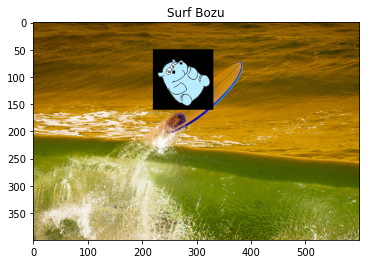

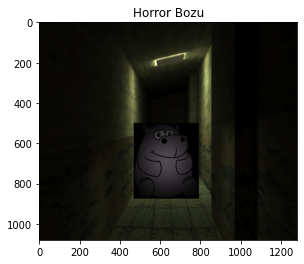

Thank you for using our program!


In [225]:
bozu_img = cv2.imread('Bozu.png')
horror_house = cv2.imread('horror_house.jpeg')
waves = cv2.imread('surf_water.jpeg')
# surf_bozu(bozu, waves)

# horror_bozu(bozu, background_img)
options_dict = {
    '1': [surf_bozu, waves],
    '2': [horror_bozu, horror_house]
}

choice = input(
    "Enter 1 to get Bozu surfing\n2 to get a Bozu in a haunted house\nor 3 to exit\nYour choice: ")

while choice != '3':
    if choice not in options_dict.keys():
        print('Invalid choice')
    else:
        # Nice documentation for this trick --> https://www.geeksforgeeks.org/python-store-function-as-dictionary-value/
        options_dict[choice][0](bozu_img, options_dict[choice][1])

    choice = input("Enter 1 to vignette Bozu\nYour choice: ")


print("Thank you for using our program!")
